In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
np.set_printoptions(threshold=None)
import datetime as dt
from datetime import datetime, timedelta
pd.set_option("display.max_columns",999)
pd.options.display.float_format = '{:,.4f}'.format
np.set_printoptions(suppress=True)
np.set_printoptions(precision=5)


In [2]:
df=pd.read_csv(r"C:\Users\jeffrey.laryea\Downloads\data_scientist_south_america_assignment.csv")
df.head()

,Domain_IdMasterAnon,EmailAddress_IdMasterAnon,Email_Action,Email_IdMasterAnon,Email_TimeEvent,Thread_IdMasterAnon
0,internal domain,24e70c189ff73a9f3f4f4a44cffcec23fc185cf0,SENT,90f9810771cc1f709add8e5578880622507faff0,2018-03-22T02:53:03,da99847698439e256fd5e75317a3e9bc94032072
1,internal domain,24e70c189ff73a9f3f4f4a44cffcec23fc185cf0,SENT,38884c505dfad9a7ed1446fc2bbd94493ca4a3ec,2018-03-20T19:54:23,0b51192c186a87a40aa17174aa06d44944093806
2,internal domain,5ec7a5be90e42e56b01e486fe17d8e847696fada,SENT,16a0f99d6ef0e6848b7ea2721703fd2274220281,2018-05-15T04:58:53,f314559dac7496d7dcb5bd268214800f9f248280
3,internal domain,5ec7a5be90e42e56b01e486fe17d8e847696fada,SENT,63743b74cde3ab282f63ea2bb6fc6be6090a8141,2018-05-15T01:41:55,f314559dac7496d7dcb5bd268214800f9f248280
4,internal domain,4200df3289f46f6b4e6f6850db805c96efa51ba0,SENT,ebd2c574ca7d1fa9c43c2e3a0d94db04ae53baa8,2018-05-30T00:12:50,48d3ac0a428b1a626e20a73cc947d76711749a9c


# Exploring the data set

In [3]:
df.columns

Index(['Domain_IdMasterAnon', 'EmailAddress_IdMasterAnon', 'Email_Action',
       'Email_IdMasterAnon', 'Email_TimeEvent', 'Thread_IdMasterAnon'],
      dtype='object')

In [4]:
df.shape

(609008, 6)

In [5]:
df.EmailAddress_IdMasterAnon.nunique()

357

In [6]:
df.Thread_IdMasterAnon.nunique()

104790

In [7]:
df.Email_IdMasterAnon.nunique()

225020

In [8]:
df.Email_Action.value_counts()

RECEIVED_TO     343721
MENTIONED_IN    129196
SENT            100203
RECEIVED_CC      35552
RECEIVED_BCC       336
Name: Email_Action, dtype: int64

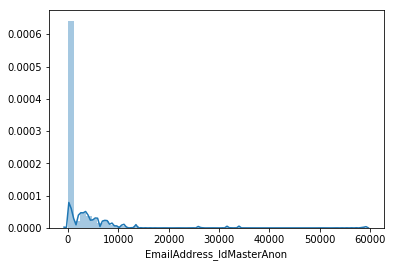

In [9]:
sns.distplot(df.EmailAddress_IdMasterAnon.value_counts())

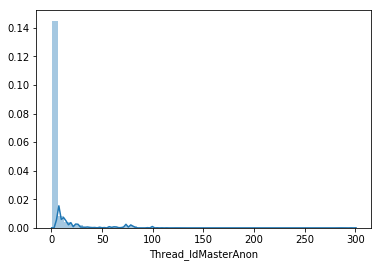

In [10]:
sns.distplot(df.Thread_IdMasterAnon.value_counts())

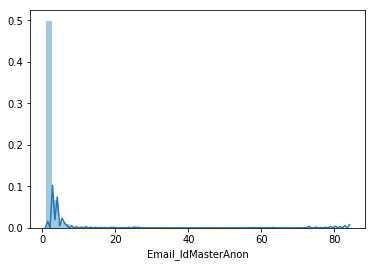

In [11]:
sns.distplot(df.Email_IdMasterAnon.value_counts())

In [12]:
df['Email_TimeEvent'] = pd.to_datetime(df['Email_TimeEvent'])

In [13]:
df.head()

,Domain_IdMasterAnon,EmailAddress_IdMasterAnon,Email_Action,Email_IdMasterAnon,Email_TimeEvent,Thread_IdMasterAnon
0,internal domain,24e70c189ff73a9f3f4f4a44cffcec23fc185cf0,SENT,90f9810771cc1f709add8e5578880622507faff0,2018-03-22 02:53:03,da99847698439e256fd5e75317a3e9bc94032072
1,internal domain,24e70c189ff73a9f3f4f4a44cffcec23fc185cf0,SENT,38884c505dfad9a7ed1446fc2bbd94493ca4a3ec,2018-03-20 19:54:23,0b51192c186a87a40aa17174aa06d44944093806
2,internal domain,5ec7a5be90e42e56b01e486fe17d8e847696fada,SENT,16a0f99d6ef0e6848b7ea2721703fd2274220281,2018-05-15 04:58:53,f314559dac7496d7dcb5bd268214800f9f248280
3,internal domain,5ec7a5be90e42e56b01e486fe17d8e847696fada,SENT,63743b74cde3ab282f63ea2bb6fc6be6090a8141,2018-05-15 01:41:55,f314559dac7496d7dcb5bd268214800f9f248280
4,internal domain,4200df3289f46f6b4e6f6850db805c96efa51ba0,SENT,ebd2c574ca7d1fa9c43c2e3a0d94db04ae53baa8,2018-05-30 00:12:50,48d3ac0a428b1a626e20a73cc947d76711749a9c


In [14]:
df.describe()

,Domain_IdMasterAnon,EmailAddress_IdMasterAnon,Email_Action,Email_IdMasterAnon,Email_TimeEvent,Thread_IdMasterAnon
count,609008,609008,609008,609008,609008,609008
unique,1,357,5,225020,181103,104790
top,internal domain,fba107f60feebaf87c15643d21fd8f9581bec4b1,RECEIVED_TO,97a3c8184e0d6787a947fa551f7e963b91e97e12,2018-04-30 03:13:56,deb43c904c52b425435ce1031081cfea37f61600
freq,609008,58942,343721,84,4553,300
first,NaN,NaN,NaN,NaN,2018-01-31 00:00:26,NaN
last,NaN,NaN,NaN,NaN,2018-05-31 23:59:59,NaN


In [15]:
df.describe(include='O')

,Domain_IdMasterAnon,EmailAddress_IdMasterAnon,Email_Action,Email_IdMasterAnon,Thread_IdMasterAnon
count,609008,609008,609008,609008,609008
unique,1,357,5,225020,104790
top,internal domain,fba107f60feebaf87c15643d21fd8f9581bec4b1,RECEIVED_TO,97a3c8184e0d6787a947fa551f7e963b91e97e12,deb43c904c52b425435ce1031081cfea37f61600
freq,609008,58942,343721,84,300


# Findings and working assumptions

- 357 Unique Emails (Assumming the 'EmailAddress_IdMasterAnon' column is the email address) 
- 104,790 unique email thread ( Assuming the 'Thread_IdMasterAnon' is the email thread) 
- 225,020 unique emails sent ( Assuming the 'Email_IdMasterAnon' is the unique email identifier) 

# Methodology 

Based on the nature of the problem, I decided to use the  Apriori alogirthm often used for frequent item set mining particularly in the retail sector. I will be using this to mine frequent email ID's often being referenced within the same email chain

Import mlxtend library containing the apriori and association rules 

In [16]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

Function to prepare "basket" data set by encoding the email chain into a binary data set, '0' for emails that weren't referenced in a chain and 1 for those that were referenced 

In [17]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

Crosstabulate the 'Thread Basket'

In [18]:
df1 = pd.crosstab(df.Thread_IdMasterAnon, df.EmailAddress_IdMasterAnon).astype('int').astype('int')

In [19]:
df1

EmailAddress_IdMasterAnon,000714c1b64b93e24229b60e062fe0e3651fe3ad,00dc82b5822763f1e88b9d26df7b3ab1c2657bf5,012c172d13097f3bff322baa5db89a94b3198d48,0130606aacc6071919696fabbc88d6f1340307b5,0139fc99496ccb3f6d52271b887aba8bf00a3f4d,0170c8bcbf1cdd542b1945106789fc3019bdc238,01a41764937b608d94d66f01da85e0659c4e48d1,01c1fb3546b2a84154a5a3e467193067bf7d3b9f,021c09bdde3d9cb677363a16ec0599de20d0a00c,0329dc03b7ff32fa1e7bf932ca899c2925bd5279,03c55dd3287e16c8603a408510033c3fff3843ce,040751767d875161b8d251528fb634e8ae15533a,04eca4a02a9b14c33d06acc3a6823d059c2046c3,05872f845a4184332f25fde3682bb2c9b64e96ef,0601092646e84a96a9bf8066c7beaa20254f480c,07f5390021f0103e9d36e9a36554b518c4eeb726,0891a4d3155015405843ca043f363af30ee4d272,09048f6ba12e31001d2e468fc91ee06d5852433e,09659a9df0334608de0530992122beb03edc4aea,09a497bf9edda2175c9c62450ebf6e8ead82f2cd,0a958f1d027526aa1ba227758d9903b93cc0c09b,0ada1051e703c4054d5a019b892366ed8dd1520b,0b14cc16d070046515bbae658cd5e029f2dcdecd,0b54e73fba18301cf3466dbbe25c26b1b3617bb8,0c17e712e2e5a5a2a9a863ac850ee92388f9bb9f,0c513d5b0287fb47f8b5c8918fe9c055f9f7c9ca,0cb9035a960c16823db69217e517d999296bdc44,0cddf93fc0b2d55a4bf5be0b1a067302ce3eb14a,0d4bd3af0dec8ff54715535cb833eaf4a042e361,0d6110f1f21087cd7f509e5a1f469b162c0173d6,0dd0831317065cfb1d492d3feb1107303980c19c,0e928eadbe5e74afec8b16571ff3679ca2b29574,0ef1f57268d62d2a5a153242adaf74a8f9b20b26,0f7580a75246012ac7699b2320c13ab69a81c5be,10bc7c4150dfc43f00dbf3574f151b55aa1fbb19,112c56f3bc021a94c1b9dfdae8ee0358acb9c329,1192ee3b626254330dad5d7a1c499ab5c015070b,12068e2268b032550348264203f52c0f6ecfef61,125a43022ab81236019165c9904f04dfbadd8090,127ee33f0418bcc7921a2fd961d605710466b24f,1281035f6c41b8ab24272dce83e9fb7bdfc01640,128713a0b4afc10a1ba444533b962f8103288031,1389ccd37602dcc585ad3e28e580df8fe452e422,14b7a25451af739a2858a1ab846d576b69bdd43c,15ca067258c2978ef44e449f064dcc561564a025,163abd6b4640f5d7a915c193d3c7c7ed5330a961,16a2b59255b6808247558e10f7c43e777a42b74b,16c2b6671688475cfec6c86e41e40a340a1e5577,16d665b30a4d006819ffccead148eede3bde839e,16d8fed346b24cba8c3b90b0d06b7b4156145eb2,170d5a464432d1fc404b9412a59bda8fb7f89986,171a52afe8ad7b1ec2e3630f37bb50e3a50b7749,172e662698b6193b02863b9a70f7561122ebb8ba,17f9460b123da232e70b5610a14b5675751d3c0a,17ff1ec6467a2d46c460df82e8d867632b7387c4,18147ff987ec7851d01bea96c6f2d87637d98717,1a7cbc35685b03c310d66bdbd73545512e923681,1b6a43c88ad8a753c1fe4f5061492cdb2fd79ab9,1c36e40f2604757fc37d1509f869c7e57060641a,1cb9139b7f856f82cc9edd28367886be5377ebe1,1d4b4cb5a506b7b87211b6a762f75b6131b8e9d3,1dd34e0e2d64be4a2862b00fd1acc4c23d5dd744,1e7aadc7d6773dcf2642fd007489fbf0ce74141e,1fd5f1813dee967cf46f13f10842c192b56cae69,2012d23bc8cfa7d375da68640561fb315376f51d,22913e2b161036006a5ba76debb8d95d7d36382c,24e70c189ff73a9f3f4f4a44cffcec23fc185cf0,24fc903e849766b6564650da3ab7818634ab928e,253483353e20e4b83dcba606b9d5599b0795192e,27167e8116b89b76c9ff1e87bcca5211ee539d2c,2753c9cff3bd827d6c95d63855d4ad964224faf9,2761313741ddb46a52d15e3c06765d073140f8e8,281fb6b434aaa0582c896a5d27c68ba63d5d82d1,288ba3348e2eae63b820149b773707ec33293a98,28b7b2845085e35ec61b6ab9e5bf7731748edba0,28fdc7e0832f822fd91550a21fb6fd35c0252de9,294130f4471521056178892924e587ab0d2684cf,2a2fad566342cf909624aac1277e21c8028bcdd5,2b2dab95bdf9d92777471ed100db94ef92f69f98,2c4eedbca42c4120902f249b63aebc63568affc5,2c7a977a627604e99dc35b9f305566d05cc47965,2ce91023f56c36b0a6473027d050c02c67eee001,2d18b42f18057de2b9c4fd19d8721584540c7e64,2d6c23ad084514150904718c10611e41fa74e1c0,2d7f16d8b1010fa8a2b6fc38d6aab0430b448642,2e25c402fe71a771b78a2e29bc42c9c06d0bd1a2,2e78521dde2b389de7536bcd6bbe5f309e076c2a,2ea255fb06de0056de80aaa453bc5157665a31c2,2ea3ac57e4f31a65484cbab6d8e7133a91ca18c4,2eb69528ecf94924c20eb9ee078f34b55bdc5cd4,2ecf09f82d1084b52a8d08b27fabaa882a61971b,3159d7ef47ad38684012766d0c24cd091915aead,32b5b787fe78d27dee440721ec67c4247aa059a6,3308c906a6b6816dcd57b08f26d971032df97d93,338c20b289cae8bc7968fb1798d2574f9ceb15ea,349e10419fb0cbb8ac0905affca381872c194f38,35ac26695f5ccb21754c5be2e0cf637266a24b

Apply the encoding function 

In [20]:
basket_sets = df1.applymap(encode_units)

In [21]:
basket_sets

EmailAddress_IdMasterAnon,000714c1b64b93e24229b60e062fe0e3651fe3ad,00dc82b5822763f1e88b9d26df7b3ab1c2657bf5,012c172d13097f3bff322baa5db89a94b3198d48,0130606aacc6071919696fabbc88d6f1340307b5,0139fc99496ccb3f6d52271b887aba8bf00a3f4d,0170c8bcbf1cdd542b1945106789fc3019bdc238,01a41764937b608d94d66f01da85e0659c4e48d1,01c1fb3546b2a84154a5a3e467193067bf7d3b9f,021c09bdde3d9cb677363a16ec0599de20d0a00c,0329dc03b7ff32fa1e7bf932ca899c2925bd5279,03c55dd3287e16c8603a408510033c3fff3843ce,040751767d875161b8d251528fb634e8ae15533a,04eca4a02a9b14c33d06acc3a6823d059c2046c3,05872f845a4184332f25fde3682bb2c9b64e96ef,0601092646e84a96a9bf8066c7beaa20254f480c,07f5390021f0103e9d36e9a36554b518c4eeb726,0891a4d3155015405843ca043f363af30ee4d272,09048f6ba12e31001d2e468fc91ee06d5852433e,09659a9df0334608de0530992122beb03edc4aea,09a497bf9edda2175c9c62450ebf6e8ead82f2cd,0a958f1d027526aa1ba227758d9903b93cc0c09b,0ada1051e703c4054d5a019b892366ed8dd1520b,0b14cc16d070046515bbae658cd5e029f2dcdecd,0b54e73fba18301cf3466dbbe25c26b1b3617bb8,0c17e712e2e5a5a2a9a863ac850ee92388f9bb9f,0c513d5b0287fb47f8b5c8918fe9c055f9f7c9ca,0cb9035a960c16823db69217e517d999296bdc44,0cddf93fc0b2d55a4bf5be0b1a067302ce3eb14a,0d4bd3af0dec8ff54715535cb833eaf4a042e361,0d6110f1f21087cd7f509e5a1f469b162c0173d6,0dd0831317065cfb1d492d3feb1107303980c19c,0e928eadbe5e74afec8b16571ff3679ca2b29574,0ef1f57268d62d2a5a153242adaf74a8f9b20b26,0f7580a75246012ac7699b2320c13ab69a81c5be,10bc7c4150dfc43f00dbf3574f151b55aa1fbb19,112c56f3bc021a94c1b9dfdae8ee0358acb9c329,1192ee3b626254330dad5d7a1c499ab5c015070b,12068e2268b032550348264203f52c0f6ecfef61,125a43022ab81236019165c9904f04dfbadd8090,127ee33f0418bcc7921a2fd961d605710466b24f,1281035f6c41b8ab24272dce83e9fb7bdfc01640,128713a0b4afc10a1ba444533b962f8103288031,1389ccd37602dcc585ad3e28e580df8fe452e422,14b7a25451af739a2858a1ab846d576b69bdd43c,15ca067258c2978ef44e449f064dcc561564a025,163abd6b4640f5d7a915c193d3c7c7ed5330a961,16a2b59255b6808247558e10f7c43e777a42b74b,16c2b6671688475cfec6c86e41e40a340a1e5577,16d665b30a4d006819ffccead148eede3bde839e,16d8fed346b24cba8c3b90b0d06b7b4156145eb2,170d5a464432d1fc404b9412a59bda8fb7f89986,171a52afe8ad7b1ec2e3630f37bb50e3a50b7749,172e662698b6193b02863b9a70f7561122ebb8ba,17f9460b123da232e70b5610a14b5675751d3c0a,17ff1ec6467a2d46c460df82e8d867632b7387c4,18147ff987ec7851d01bea96c6f2d87637d98717,1a7cbc35685b03c310d66bdbd73545512e923681,1b6a43c88ad8a753c1fe4f5061492cdb2fd79ab9,1c36e40f2604757fc37d1509f869c7e57060641a,1cb9139b7f856f82cc9edd28367886be5377ebe1,1d4b4cb5a506b7b87211b6a762f75b6131b8e9d3,1dd34e0e2d64be4a2862b00fd1acc4c23d5dd744,1e7aadc7d6773dcf2642fd007489fbf0ce74141e,1fd5f1813dee967cf46f13f10842c192b56cae69,2012d23bc8cfa7d375da68640561fb315376f51d,22913e2b161036006a5ba76debb8d95d7d36382c,24e70c189ff73a9f3f4f4a44cffcec23fc185cf0,24fc903e849766b6564650da3ab7818634ab928e,253483353e20e4b83dcba606b9d5599b0795192e,27167e8116b89b76c9ff1e87bcca5211ee539d2c,2753c9cff3bd827d6c95d63855d4ad964224faf9,2761313741ddb46a52d15e3c06765d073140f8e8,281fb6b434aaa0582c896a5d27c68ba63d5d82d1,288ba3348e2eae63b820149b773707ec33293a98,28b7b2845085e35ec61b6ab9e5bf7731748edba0,28fdc7e0832f822fd91550a21fb6fd35c0252de9,294130f4471521056178892924e587ab0d2684cf,2a2fad566342cf909624aac1277e21c8028bcdd5,2b2dab95bdf9d92777471ed100db94ef92f69f98,2c4eedbca42c4120902f249b63aebc63568affc5,2c7a977a627604e99dc35b9f305566d05cc47965,2ce91023f56c36b0a6473027d050c02c67eee001,2d18b42f18057de2b9c4fd19d8721584540c7e64,2d6c23ad084514150904718c10611e41fa74e1c0,2d7f16d8b1010fa8a2b6fc38d6aab0430b448642,2e25c402fe71a771b78a2e29bc42c9c06d0bd1a2,2e78521dde2b389de7536bcd6bbe5f309e076c2a,2ea255fb06de0056de80aaa453bc5157665a31c2,2ea3ac57e4f31a65484cbab6d8e7133a91ca18c4,2eb69528ecf94924c20eb9ee078f34b55bdc5cd4,2ecf09f82d1084b52a8d08b27fabaa882a61971b,3159d7ef47ad38684012766d0c24cd091915aead,32b5b787fe78d27dee440721ec67c4247aa059a6,3308c906a6b6816dcd57b08f26d971032df97d93,338c20b289cae8bc7968fb1798d2574f9ceb15ea,349e10419fb0cbb8ac0905affca381872c194f38,35ac26695f5ccb21754c5be2e0cf637266a24b

Get frequent item sets using th apriori function with a minimum support of 0.034

In [22]:
frequent_itemsets = apriori(basket_sets, min_support=0.034, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [23]:
frequent_itemsets

,support,itemsets,length
0,0.0399,(000714c1b64b93e24229b60e062fe0e3651fe3ad),1
1,0.0448,(03c55dd3287e16c8603a408510033c3fff3843ce),1
2,0.0487,(040751767d875161b8d251528fb634e8ae15533a),1
3,0.0451,(0a958f1d027526aa1ba227758d9903b93cc0c09b),1
4,0.0570,(0cddf93fc0b2d55a4bf5be0b1a067302ce3eb14a),1
...,...,...,...
163,0.0340,"(b3acbc82275248f8a88dd3eb640ba8fd3c792f8a, eb9...",5
164,0.0340,"(b3acbc82275248f8a88dd3eb640ba8fd3c792f8a, eb9...",5
165,0.0341,"(805685d98998b12b1832635542448fa7544b106e, b3a...",5
166,0.0345,"(805685d98998b12b1832635542448fa7544b106e, b3a...",6


Since its unlikely to have teams of just 1, i filtered out for item sets containing more than 1 email address. 
The Support value is indicative of how frequently an item set appears in an email chain/thread as a proportion of all emails in the thread

In [24]:
teams=frequent_itemsets[frequent_itemsets.length>1].reset_index(drop=True)

In [25]:
teams.shape

(122, 3)

In [26]:
teams

,support,itemsets,length
0,0.0342,"(125a43022ab81236019165c9904f04dfbadd8090, 112...",2
1,0.0354,"(6888bc3d704405c4f75a6bbf60d7a2a6503f852b, 112...",2
2,0.0465,"(125a43022ab81236019165c9904f04dfbadd8090, 2c4...",2
3,0.0371,"(3a9646f981b1197b9749a852e9ac97131f558a70, 281...",2
4,0.0390,"(6888bc3d704405c4f75a6bbf60d7a2a6503f852b, 281...",2
...,...,...,...
117,0.0340,"(b3acbc82275248f8a88dd3eb640ba8fd3c792f8a, eb9...",5
118,0.0340,"(b3acbc82275248f8a88dd3eb640ba8fd3c792f8a, eb9...",5
119,0.0341,"(805685d98998b12b1832635542448fa7544b106e, b3a...",5
120,0.0345,"(805685d98998b12b1832635542448fa7544b106e, b3a...",6


Here, we mine the association rules from the frequent item sets using the lift metric with the minimum threshold for that being set to 1. 'Lift' in this case is the probability of all the email addresses in a rule being referenced in 1 email thread. Mathematically/Statistically, its the support divided by the product of the probabilities of the email addresses on the left and right hand side occurring  as though there was no association between them 

In [27]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(125a43022ab81236019165c9904f04dfbadd8090),(112c56f3bc021a94c1b9dfdae8ee0358acb9c329),0.0853,0.0550,0.0342,0.4015,7.3018,0.0296,1.5790
1,(112c56f3bc021a94c1b9dfdae8ee0358acb9c329),(125a43022ab81236019165c9904f04dfbadd8090),0.0550,0.0853,0.0342,0.6229,7.3018,0.0296,2.4254
2,(6888bc3d704405c4f75a6bbf60d7a2a6503f852b),(112c56f3bc021a94c1b9dfdae8ee0358acb9c329),0.0739,0.0550,0.0354,0.4782,8.6976,0.0313,1.8112
3,(112c56f3bc021a94c1b9dfdae8ee0358acb9c329),(6888bc3d704405c4f75a6bbf60d7a2a6503f852b),0.0550,0.0739,0.0354,0.6430,8.6976,0.0313,2.5941
4,(125a43022ab81236019165c9904f04dfbadd8090),(2c4eedbca42c4120902f249b63aebc63568affc5),0.0853,0.1500,0.0465,0.5450,3.6329,0.0337,1.8682


In [28]:
rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(125a43022ab81236019165c9904f04dfbadd8090),(112c56f3bc021a94c1b9dfdae8ee0358acb9c329),0.0853,0.0550,0.0342,0.4015,7.3018,0.0296,1.5790
1,(112c56f3bc021a94c1b9dfdae8ee0358acb9c329),(125a43022ab81236019165c9904f04dfbadd8090),0.0550,0.0853,0.0342,0.6229,7.3018,0.0296,2.4254
2,(6888bc3d704405c4f75a6bbf60d7a2a6503f852b),(112c56f3bc021a94c1b9dfdae8ee0358acb9c329),0.0739,0.0550,0.0354,0.4782,8.6976,0.0313,1.8112
3,(112c56f3bc021a94c1b9dfdae8ee0358acb9c329),(6888bc3d704405c4f75a6bbf60d7a2a6503f852b),0.0550,0.0739,0.0354,0.6430,8.6976,0.0313,2.5941
4,(125a43022ab81236019165c9904f04dfbadd8090),(2c4eedbca42c4120902f249b63aebc63568affc5),0.0853,0.1500,0.0465,0.5450,3.6329,0.0337,1.8682
...,...,...,...,...,...,...,...,...,...
1139,(b3acbc82275248f8a88dd3eb640ba8fd3c792f8a),"(805685d98998b12b1832635542448fa7544b106e, eb9...",0.0692,0.0340,0.0340,0.4918,14.4598,0.0317,1.9008
1140,(eb91565f45b0ef4cd8a26dd03ac6a6d6bee38d9a),"(805685d98998b12b1832635542448fa7544b106e, b3a...",0.0783,0.0348,0.0340,0.4342,12.4900,0.0313,1.7060
1141,(5305b54cdd8f497cc8551a50fd43cd31783782a3),"(b3acbc82275248f8a88dd3eb640ba8fd3c792f8a, eb9...",0.0439,0.0340,0.0340,0.7739,22.7557,0.0325,4.2732
1142,(44ab4a6cac6a5cebb0b5683740d49bf18e57f567),"(805685d98998b12b1832635542448fa7544b106e, b3a...",0.0400,0.0341,0.0340,0.8496,24.9168,0.0326,6.4215


Here we plot a network graph to visualize the relationships within the rules and how the emails in one thread are connected together using the below function. 

In [29]:
def draw_graph(rules, rules_to_show):
  import networkx as nx  
  G1 = nx.DiGraph()
   
  color_map=[]
  N = 50
  colors = np.random.rand(N)    
  strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
   
  for i in range (rules_to_show):      
    G1.add_nodes_from(["R"+str(i)])
    
     
    for a in rules.iloc[i]['antecedents']:
                
        G1.add_nodes_from([a])
        
        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
    for c in rules.iloc[i]['consequents']:
             
            G1.add_nodes_from([c])
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
  for node in G1:
       found_a_string = False
       for item in strs: 
           if node==item:
                found_a_string = True
       if found_a_string:
            color_map.append('yellow')
       else:
            color_map.append('green')       
 
 
   
  edges = G1.edges()
  colors = [G1[u][v]['color'] for u,v in edges]
  weights = [G1[u][v]['weight'] for u,v in edges]
 
  pos = nx.spring_layout(G1, k=16, scale=1)
  nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
  for p in pos:  # raise text positions
           pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)
  plt.show()

This function, when called, will plot an aggregated network map with the first 'n' number of rules. The function is 'draw_graph(rules,rules_to_show) where 'rules_to_show' is the first 'n' number of rules in the data set to be plotted

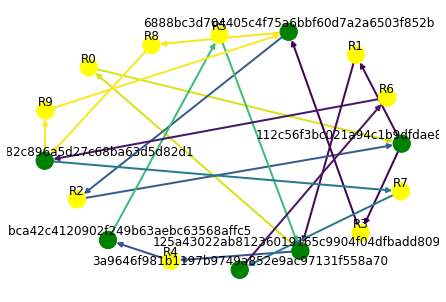

In [30]:
draw_graph(rules,10)

Here, you can plot out a more specific rule to to view its relationships by specifying its index in the DF as seen below

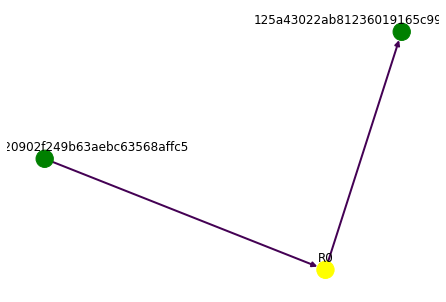

In [31]:
rules_row=rules.loc[[5]]
draw_graph(rules_row,1)

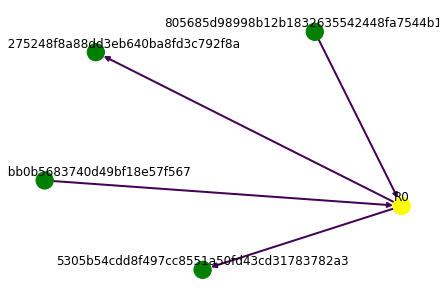

In [32]:
rules_row=rules.loc[[500]]
draw_graph(rules_row,1)

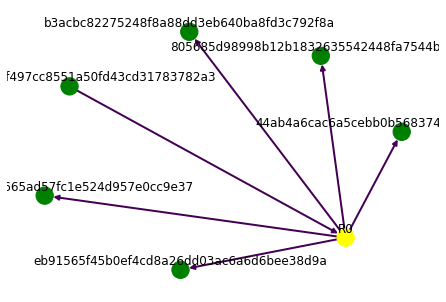

In [33]:
rules_row=rules.loc[[1141]]
draw_graph(rules_row,1)